# DOG BREED IDENTIFICATION

IMPORTING LIBRARIES for EDA

In [3]:
import pandas as pd

In [68]:
labels_filepath = "E:/DOG-BREED-IDENTIFICATION/labels.csv"
labels_dataframe = pd.read_csv(labels_filepath)
labels_dataframe.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [6]:
labels_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,cf6e0ec97666cf8ddc3de90f1273ff4d,scottish_deerhound
freq,1,126


In [7]:
# Checking Class Balancing
print("Maximum samples for a breed: ", labels_df.breed.value_counts().max()) 
print("Minimum samples for a breed: ", labels_df.breed.value_counts().min())

Maximum samples for a breed:  126
Minimum samples for a breed:  66


<AxesSubplot:>

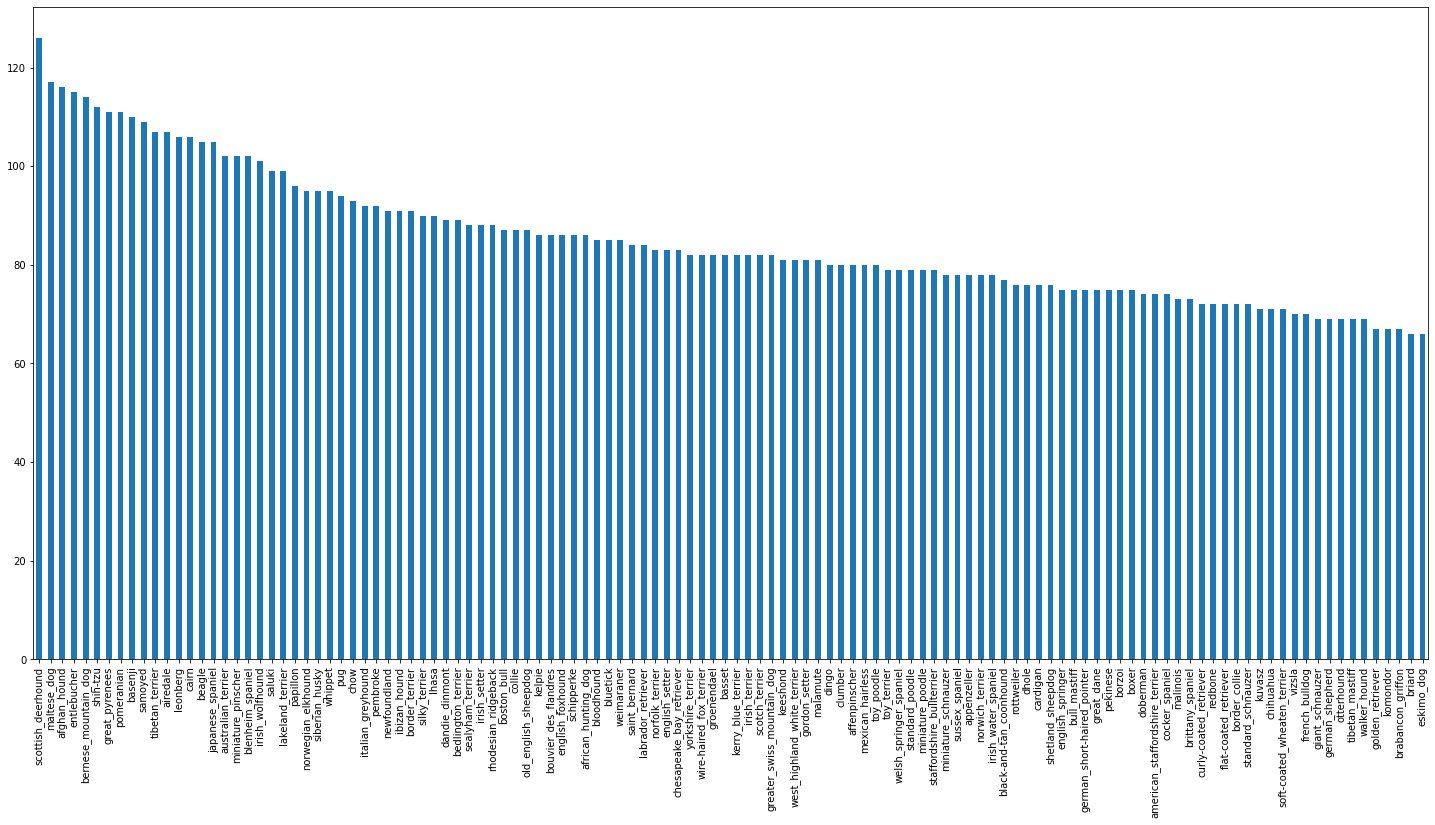

In [8]:
labels_dataframe.breed.value_counts().plot.bar(figsize=(25,12))

WE CLEARLY SEE IMBALANCE OF CLASSES OF BREEDS:
    
FIRST LETS BUILD THE CNN FROM SCRATCH WITH SOME ACTIVATION FUNCTION AND OPTIMIZERS AND CHECK ON THE RAW DATSET WITHOUT ANY AUGUMENTATION.

# CNN LAYERS BUILDING

LET US CREATE TYPICAL SEQENTIAL MODEL USING KERAS PAKAGE AND TARIN IT ON SOME BASIC PARAMETERS

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint  
import datetime
from keras.preprocessing.image import ImageDataGenerator

In [65]:
train_dir='./train'
test_dir='./test'

In [66]:
print("No of dog's images in train directory",len(os.listdir(train_dir)))
print("No of dog's images in test directory",len(os.listdir(test_dir)))

No of dog's images in train directory 10222
No of dog's images in test directory 3485


In [70]:
dog_breeds=sorted(list(set(labels_dataframe['breed'])))
n_classes=len(dog_breeds)
print(n_classes)
print(dog_breeds)

120
['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', '

In [71]:
classes_to_num=dict(zip(dog_breeds,range(n_classes)))

In [73]:
(train_dir+'/'+labels_dataframe['id']+'.jpg')[0]

'./train/000bec180eb18c7604dcecc8fe0dba07.jpg'

In [72]:
classes_to_num

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

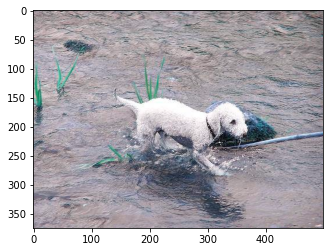

In [76]:
from matplotlib import pyplot as plt
plt.imshow(cv2.imread((train_dir+'/'+labels_dataframe.id+'.jpg')[5]))

# APPLYING CONCEPT OF IMAGE AGUMENTATION

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [9]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

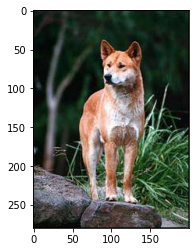

In [30]:
img = load_img('E:/DOG-BREED-IDENTIFICATION/train/00a338a92e4e7bf543340dc849230e75.jpg')  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  
plt.imshow(img)

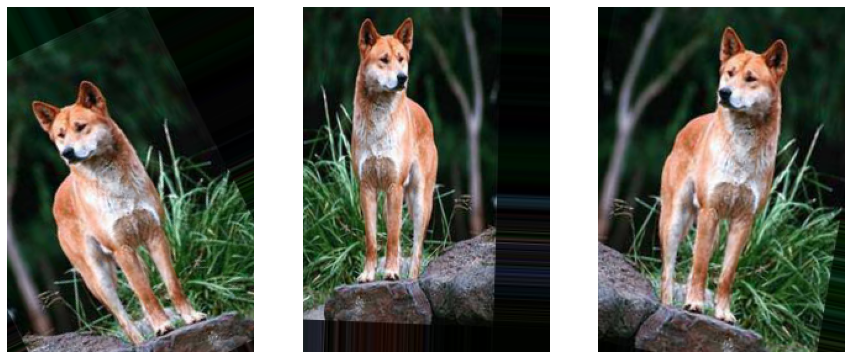

In [32]:
aug_iter = datagen.flow(x, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')